Aqui vamos analisar o perfil dos candidatos (genero, cor/raça, profissão) e relacionar com o financiamento de campanha. Podemos 

In [8]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
df_receita = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/receita_candidato.csv', encoding='latin-1', sep=',')
df_receita = df_receita[df_receita['VR_RECEITA']>0]
df_receita_p = df_receita.pivot_table(index='SQ_CANDIDATO', columns='DS_ORIGEM_RECEITA', values='VR_RECEITA', aggfunc='sum', fill_value=0)


In [10]:
df_candidato = pd.read_csv('dados/processados/SP/2022/DeputadoFederal/candidato.csv', encoding='latin-1', sep=',')
df_candidato = df_candidato[['SQ_CANDIDATO', 'SG_PARTIDO', 'SG_FEDERACAO', 'DS_GENERO', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA']]
df_candidato = pd.merge(df_candidato, df_receita_p, on='SQ_CANDIDATO')
df_candidato

,SQ_CANDIDATO,SG_PARTIDO,SG_FEDERACAO,DS_GENERO,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,Doações pela Internet,Recursos de Financiamento Coletivo,Recursos de origens não identificadas,Recursos de outros candidatos,Recursos de partido político,Recursos de pessoas físicas,Recursos próprios,Rendimentos de aplicações financeiras
0,250001643887,PSC,#NULO#,MASCULINO,PARDA,ADVOGADO,3176572.53,0,0.00,0.00,0.00,10000.00,3170.00,0.00,0.00
1,250001597671,NOVO,#NULO#,FEMININO,BRANCA,PROFESSOR DE ENSINO SUPERIOR,3176572.53,0,34539.28,0.00,0.00,46841.53,954467.70,0.00,0.00
2,250001611240,MDB,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,0.00,1200000.00,1514945.14,19400.00,0.00
3,250001635955,PMB,#NULO#,MASCULINO,BRANCA,SERVIDOR PÚBLICO MUNICIPAL,3176572.53,0,0.00,0.00,0.00,0.00,0.00,1801.00,0.00
4,250001620711,PATRIOTA,#NULO#,MASCULINO,BRANCA,MILITAR REFORMADO,3176572.53,0,0.00,0.00,1000.00,401118.90,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,250001717128,AGIR,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,5000.00,0.00,0.00,0.00,0.00
1398,250001604937,PSD,#NULO#,MASCULINO,PARDA,SERVIDOR PÚBLICO MUNICIPAL,3176572.53,0,0.00,0.00,0.00,110256.41,0.00,0.00,0.00
1399,250001620762,PATRIOTA,#NULO#,MASCULINO,BRANCA,OUTROS,3176572.53,0,0.00,0.00,11.00,75778.90,0.00,0.00,0.00
1400,250001715883,PRTB,#NULO#,MASCULINO,BRANCA,SERVIDOR PÚBLICO ESTADUAL,3176572.53,0,0.00,0.00,0.00,2822.09,0.00,0.00,0.00


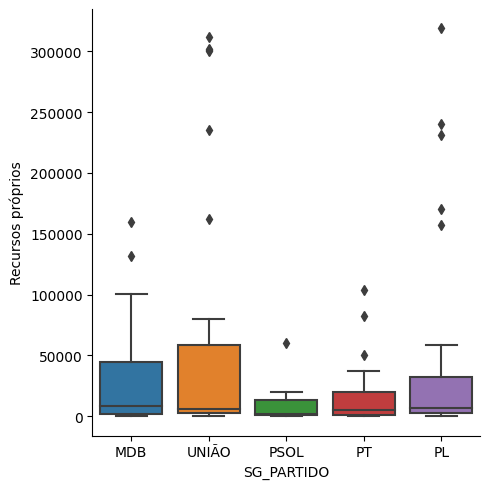

In [18]:
import seaborn as sns

df_filtro = df_candidato[(df_candidato['SG_PARTIDO'].isin(['PT', 'PSOL', 'PL', 'MDB', 'UNIÃO'])) & (df_candidato['Recursos próprios']>0)]
sns.catplot(data=df_filtro, y='Recursos próprios', x='SG_PARTIDO', kind='box')

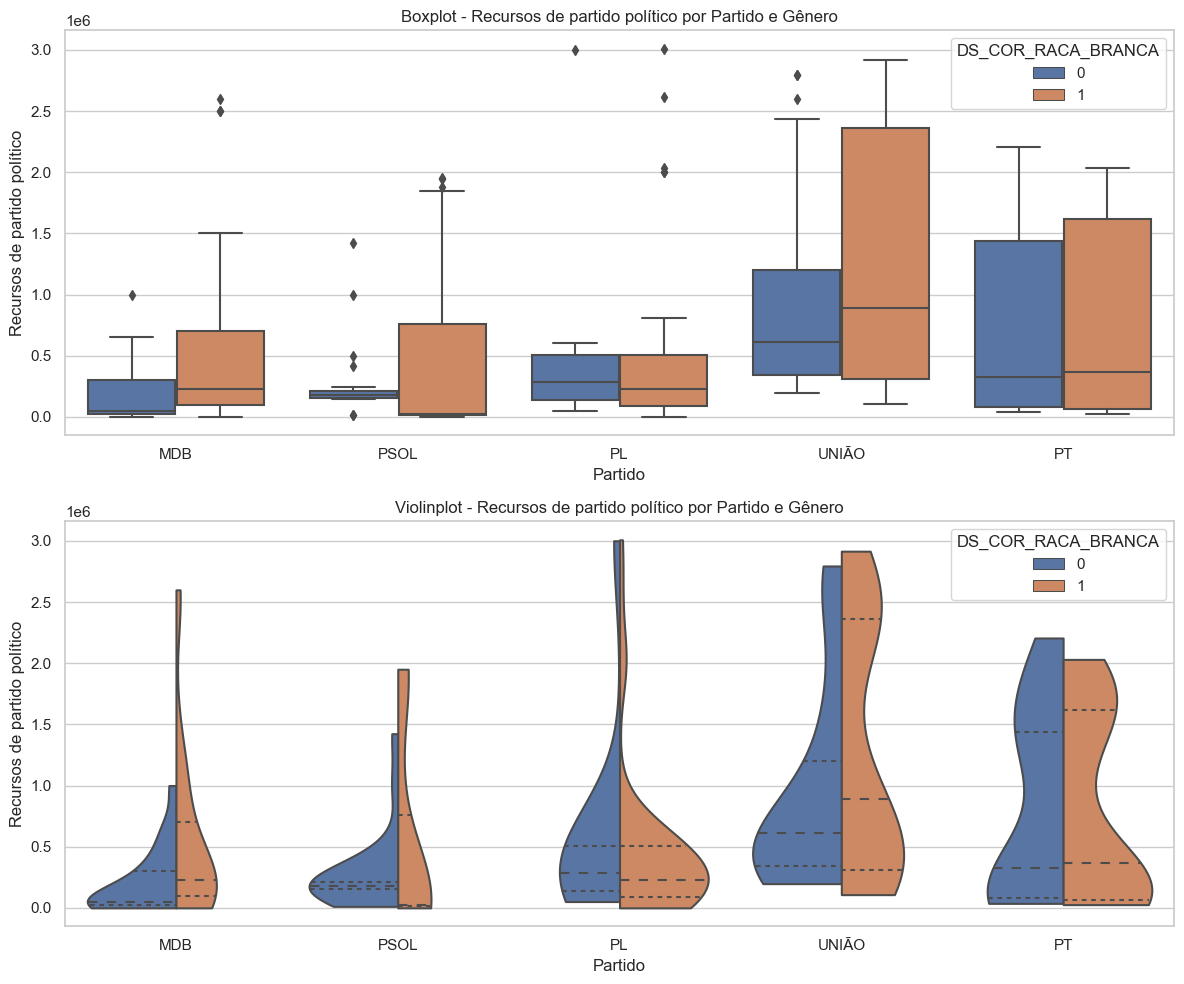

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_filtro é o seu DataFrame com os dados
df_filtro = df_candidato[df_candidato['SG_PARTIDO'].isin(['PT', 'PSOL', 'PL', 'MDB', 'UNIÃO'])]
df_filtro = pd.get_dummies(df_filtro, columns=['DS_COR_RACA'])

# Ajustando o estilo para melhor visualização
#sns.set(style="whitegrid")

# Criando subplots para os dois catplots um em cima do outro
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de caixa (boxplot)
sns.boxplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_COR_RACA_BRANCA',
            ax=axes[0])
axes[0].set_title('Boxplot - Recursos de partido político por Partido e Gênero')
axes[0].set_xlabel('Partido')
axes[0].set_ylabel('Recursos de partido político')

# Gráfico de violino
sns.violinplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_COR_RACA_BRANCA',
               ax=axes[1], split=True, inner='quart', cut=0)
axes[1].set_title('Violinplot - Recursos de partido político por Partido e Gênero')
axes[1].set_xlabel('Partido')
axes[1].set_ylabel('Recursos de partido político')

plt.tight_layout()
plt.show()


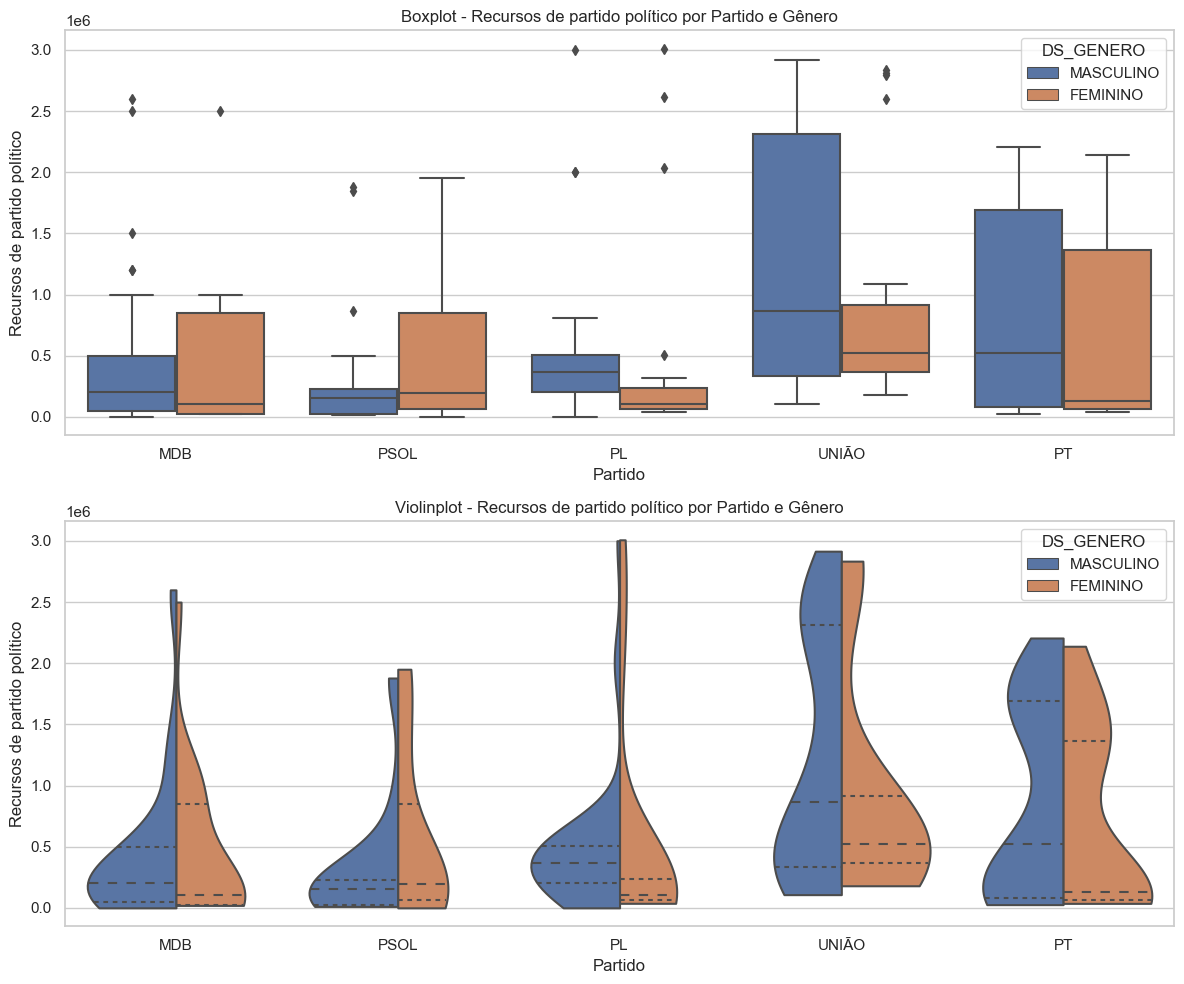

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_filtro é o seu DataFrame com os dados
df_filtro = df_candidato[df_candidato['SG_PARTIDO'].isin(['PT', 'PSOL', 'PL', 'MDB', 'UNIÃO'])]
df_filtro = pd.get_dummies(df_filtro, columns=['DS_COR_RACA'])

# Ajustando o estilo para melhor visualização
#sns.set(style="whitegrid")

# Criando subplots para os dois catplots um em cima do outro
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de caixa (boxplot)
sns.boxplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_GENERO',
            ax=axes[0])
axes[0].set_title('Boxplot - Recursos de partido político por Partido e Gênero')
axes[0].set_xlabel('Partido')
axes[0].set_ylabel('Recursos de partido político')

# Gráfico de violino
sns.violinplot(data=df_filtro, y='Recursos de partido político', x='SG_PARTIDO', hue='DS_GENERO',
               ax=axes[1], split=True, inner='quart', cut=0)
axes[1].set_title('Violinplot - Recursos de partido político por Partido e Gênero')
axes[1].set_xlabel('Partido')
axes[1].set_ylabel('Recursos de partido político')

plt.tight_layout()
plt.show()


In [15]:
mdb_b_mean = df_filtro[(df_filtro['SG_PARTIDO']=='MDB') & (df_filtro['DS_COR_RACA_BRANCA']==1)]['Recursos de partido político'].mean()
mdb_nb_mean = df_filtro[(df_filtro['SG_PARTIDO']=='MDB') & (df_filtro['DS_COR_RACA_BRANCA']==0)]['Recursos de partido político'].mean()

print("A media de financiamento do partido para candidatos brancos é de: {}".format(mdb_b_mean))
print("A media de financiamento do partido para candidatos não brancos é de: {}".format(mdb_nb_mean))

A media de financiamento do partido para candidatos brancos é de: 524627.9069767442
A media de financiamento do partido para candidatos não brancos é de: 198750.0


In [16]:
mdb_b_mean = df_filtro[(df_filtro['SG_PARTIDO']=='MDB') & (df_filtro['DS_COR_RACA_BRANCA']==1)]['Recursos de partido político'].median()
mdb_nb_mean = df_filtro[(df_filtro['SG_PARTIDO']=='MDB') & (df_filtro['DS_COR_RACA_BRANCA']==0)]['Recursos de partido político'].median()

print("A mediana de financiamento do partido para candidatos brancos é de: {}".format(mdb_b_mean))
print("A mediana de financiamento do partido para candidatos não brancos é de: {}".format(mdb_nb_mean))

A mediana de financiamento do partido para candidatos brancos é de: 225000.0
A mediana de financiamento do partido para candidatos não brancos é de: 50000.0
